In [1]:
import pandas as pd
import numpy as np
from HelperFunctions import subset_df_and_rename_columns, merge_two_df

/Users/tianji/mambaforge/envs/myenv/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Merge PTBP1, RBFOX2, hnRNPC, DHX9

In [2]:
PTBP1_HepG2_df = pd.read_csv('/Users/tianji/Desktop/Alu Project/DSE_Results_Data/RBFOX2 and PTBP1/HepG2.PTBP1.cass.diff.txt', sep = '\t')
RBFOX2_HepG2_df = pd.read_csv('/Users/tianji/Desktop/Alu Project/DSE_Results_Data/RBFOX2 and PTBP1/HepG2.RBFOX2.cass.diff.txt', sep = '\t')
PTBP1_K562_df = pd.read_csv('/Users/tianji/Desktop/Alu Project/DSE_Results_Data/RBFOX2 and PTBP1/K562.PTBP1.cass.diff.txt', sep = '\t')
RBFOX2_K562_df = pd.read_csv('/Users/tianji/Desktop/Alu Project/DSE_Results_Data/RBFOX2 and PTBP1/K562.RBFOX2.cass.diff.txt', sep = '\t')
hnRNPC_rep1 = pd.read_csv('/Users/tianji/Desktop/Alu Project/DSE_Results_Data/hnRNPC/hnRNPC.Cass.KDvsCtrl.Rep1.AlterSpliceResults.txt', sep = '\t')
hnRNPC_rep2 = pd.read_csv('/Users/tianji/Desktop/Alu Project/DSE_Results_Data/hnRNPC/hnRNPC.Cass.KDvsCtrl.Rep2.AlterSpliceResults.txt', sep = '\t')
DHX9_rep1 = pd.read_csv('/Users/tianji/Desktop/Alu Project/DSE_Results_Data/DHX9/DHX9.Cass.KDvsCtrl.Rep1.AlterSpliceResults.txt', sep = '\t')
DHX9_rep2 = pd.read_csv('/Users/tianji/Desktop/Alu Project/DSE_Results_Data/DHX9/DHX9.Cass.KDvsCtrl.Rep2.AlterSpliceResults.txt', sep = '\t')

print(f"PTBP1 HepG2: {len(PTBP1_HepG2_df)}")
print(f"RBFOX2 HepG2: {len(RBFOX2_HepG2_df)}")
print(f"PTBP1 K562: {len(PTBP1_K562_df)}")
print(f"RBFOX2 K562: {len(RBFOX2_K562_df)}")
print(f"hnRNPC rep1: {len(hnRNPC_rep1)}")
print(f"hnRNPC rep2: {len(hnRNPC_rep2)}")
print(f"DHX9 rep1: {len(DHX9_rep1)}")
print(f"DHX9 rep2: {len(DHX9_rep2)}")

# Rename the I_g1 Ctrl column for each data frame 
PTBP1_HepG2_df = PTBP1_HepG2_df.rename(columns = {'I_g1(Ctrl_HepG2)':'I_g1(PTBP1_Ctrl_HepG2)'})
RBFOX2_HepG2_df = RBFOX2_HepG2_df.rename(columns = {'I_g1(Ctrl_HepG2)':'I_g1(RBFOX2_Ctrl_HepG2)'})
PTBP1_K562_df = PTBP1_K562_df.rename(columns = {'I_g1(Ctrl_K562)':'I_g1(PTBP1_Ctrl_K562)'})
RBFOX2_K562_df = RBFOX2_K562_df.rename(columns = {'I_g1(Ctrl_K562)':'I_g1(RBFOX2_Ctrl_HepG2)'})
# Subset each data frame to contain only columns we are interested in and rename the column to have a distinct name
PTBP1_HepG2_df = subset_df_and_rename_columns(PTBP1_HepG2_df, 'PTBP1_HepG2')
RBFOX2_HepG2_df = subset_df_and_rename_columns(RBFOX2_HepG2_df, 'RBFOX2_HepG2')
PTBP1_K562_df = subset_df_and_rename_columns(PTBP1_K562_df, 'PTBP1_K562')
RBFOX2_K562_df = subset_df_and_rename_columns(RBFOX2_K562_df, 'RBFOX2_K562')
hnRNPC_rep1_df = subset_df_and_rename_columns(hnRNPC_rep1, 'hnRNPC_KD.1')
hnRNPC_rep2_df = subset_df_and_rename_columns(hnRNPC_rep2, 'hnRNPC_KD.2')
DHX9_rep1_df = subset_df_and_rename_columns(DHX9_rep1, 'DHX9_KD.1')
DHX9_rep2_df = subset_df_and_rename_columns(DHX9_rep2, 'DHX9_KD.2')

# Merge four data frames together 
Ctrl_cass_merged_df = merge_two_df(PTBP1_HepG2_df, RBFOX2_HepG2_df, df2merge_suffix = 'RBFOX2_HepG2', df2merge_Ig1_suffix = 'RBFOX2_Ctrl_HepG2', df2merge_Ig2_suffix = 'RBFOX2_KD_HepG2')
print(len(Ctrl_cass_merged_df))
Ctrl_cass_merged_df = merge_two_df(Ctrl_cass_merged_df, PTBP1_K562_df, df2merge_suffix = 'PTBP1_K562', df2merge_Ig1_suffix = 'PTBP1_Ctrl_K562', df2merge_Ig2_suffix = 'PTBP1_KD_K562')
print(len(Ctrl_cass_merged_df))
Ctrl_cass_merged_df = merge_two_df(Ctrl_cass_merged_df, RBFOX2_K562_df, df2merge_suffix = 'RBFOX2_K562', df2merge_Ig1_suffix = 'RBFOX2_Ctrl_HepG2', df2merge_Ig2_suffix = 'RBFOX2_KD_K562')
print(len(Ctrl_cass_merged_df))
Ctrl_cass_merged_df = merge_two_df(Ctrl_cass_merged_df, hnRNPC_rep1_df, df2merge_suffix = 'hnRNPC_KD.1', df2merge_Ig1_suffix = 'Ctrl.1', df2merge_Ig2_suffix = 'hnRNPC_KD.1')
print(len(Ctrl_cass_merged_df))
Ctrl_cass_merged_df = merge_two_df(Ctrl_cass_merged_df, hnRNPC_rep2_df, df2merge_suffix = 'hnRNPC_KD.2', df2merge_Ig1_suffix = 'Ctrl.2', df2merge_Ig2_suffix = 'hnRNPC_KD.2')
print(len(Ctrl_cass_merged_df))
Ctrl_cass_merged_df = merge_two_df(Ctrl_cass_merged_df, DHX9_rep1_df, df2merge_suffix = 'DHX9_KD.1', df2merge_Ig1_suffix = 'Ctrl.1', df2merge_Ig2_suffix = 'DHX9_KD.1')
print(len(Ctrl_cass_merged_df))
Ctrl_cass_merged_df = merge_two_df(Ctrl_cass_merged_df, DHX9_rep2_df, df2merge_suffix = 'DHX9_KD.2', df2merge_Ig1_suffix = 'Ctrl.2', df2merge_Ig2_suffix = 'DHX9_KD.2')
print(len(Ctrl_cass_merged_df))

PTBP1 HepG2: 175400
RBFOX2 HepG2: 175400
PTBP1 K562: 175400
RBFOX2 K562: 175400
hnRNPC rep1: 42761
hnRNPC rep2: 42761
DHX9 rep1: 42761
DHX9 rep2: 42761
175400
175400
175400
175400
175400
175400
175400


In [3]:
print(Ctrl_cass_merged_df['filter(hnRNPC_KD.1)'].value_counts())
print(Ctrl_cass_merged_df['filter(hnRNPC_KD.2)'].value_counts())
print("\n______DHX9_______")
print(Ctrl_cass_merged_df['filter(DHX9_KD.1)'].value_counts())
print(Ctrl_cass_merged_df['filter(DHX9_KD.2)'].value_counts())

filter(hnRNPC_KD.1)
 0.0    3311
 1.0     564
-1.0     432
Name: count, dtype: int64
filter(hnRNPC_KD.2)
 0.0    3339
 1.0     525
-1.0     441
Name: count, dtype: int64

______DHX9_______
filter(DHX9_KD.1)
 0.0    10077
-1.0      809
 1.0      741
Name: count, dtype: int64
filter(DHX9_KD.2)
 0.0    10694
-1.0     1109
 1.0      446
Name: count, dtype: int64


In [4]:
def compute_intersect(df, col1, col2, output_col):
    def logic(row):
        val1 = row[col1]
        val2 = row[col2]
        if pd.isna(val1) or pd.isna(val2):
            return pd.NA
        if val1 == -1 and val2 == -1:
            return -1
        if val1 == 1 and val2 == 1:
            return 1
        return 0

    df[output_col] = df.apply(logic, axis=1)
    return df

def compute_union(df, col1, col2, output_col):
    def logic(row):
        val1 = row[col1]
        val2 = row[col2]
        if pd.isna(val1) and pd.isna(val2):
            return pd.NA

        result = 0
        if (val1 == 1 or val2 == 1) and (val1 != -1 and val2 != -1):
            result = 1
        elif (val1 == -1 or val2 == -1) and (val1 != 1 and val2 != 1):
            result = -1
        return result

    df[output_col] = df.apply(logic, axis=1)
    return df


Ctrl_cass_merged_df = compute_intersect(
    Ctrl_cass_merged_df,
    'filter(PTBP1_HepG2)',
    'filter(PTBP1_K562)',
    'filter(PTBP1_intersect)'
)

Ctrl_cass_merged_df = compute_union(
    Ctrl_cass_merged_df,
    'filter(PTBP1_HepG2)',
    'filter(PTBP1_K562)',
    'filter(PTBP1_union)'
)


Ctrl_cass_merged_df = compute_intersect(
    Ctrl_cass_merged_df,
    'filter(RBFOX2_HepG2)',
    'filter(RBFOX2_K562)',
    'filter(RBFOX2_intersect)'
)

Ctrl_cass_merged_df = compute_union(
    Ctrl_cass_merged_df,
    'filter(RBFOX2_HepG2)',
    'filter(RBFOX2_K562)',
    'filter(RBFOX2_union)'
)

import numpy as np

# hnRNPC logic
a = Ctrl_cass_merged_df['filter(hnRNPC_KD.2)']
b = Ctrl_cass_merged_df['filter(hnRNPC_KD.1)']
cov1 = Ctrl_cass_merged_df['coverage(hnRNPC_KD.1)']
cov2 = Ctrl_cass_merged_df['coverage(hnRNPC_KD.2)']

# Start with NaN
Ctrl_cass_merged_df['filter(hnRNPC_high_conf)'] = np.nan  

# Assign 0 if either coverage > 20
mask_cov = (cov1 > 20) | (cov2 > 20)
Ctrl_cass_merged_df.loc[mask_cov, 'filter(hnRNPC_high_conf)'] = 0

# Upgrade 0 → -1 if both filters are -1
mask_both_neg = mask_cov & (a == -1) & (b == -1)
Ctrl_cass_merged_df.loc[mask_both_neg, 'filter(hnRNPC_high_conf)'] = -1

# Upgrade 0 → 1 if both filters are 1
mask_both_pos = mask_cov & (a == 1) & (b == 1)
Ctrl_cass_merged_df.loc[mask_both_pos, 'filter(hnRNPC_high_conf)'] = 1


# DHX9 logic
a = Ctrl_cass_merged_df['filter(DHX9_KD.2)']
b = Ctrl_cass_merged_df['filter(DHX9_KD.1)']
cov1 = Ctrl_cass_merged_df['coverage(DHX9_KD.1)']
cov2 = Ctrl_cass_merged_df['coverage(DHX9_KD.2)']

Ctrl_cass_merged_df['filter(DHX9_high_conf)'] = np.nan  

mask_cov = (cov1 > 20) | (cov2 > 20)
Ctrl_cass_merged_df.loc[mask_cov, 'filter(DHX9_high_conf)'] = 0

mask_both_neg = mask_cov & (a == -1) & (b == -1)
Ctrl_cass_merged_df.loc[mask_both_neg, 'filter(DHX9_high_conf)'] = -1

mask_both_pos = mask_cov & (a == 1) & (b == 1)
Ctrl_cass_merged_df.loc[mask_both_pos, 'filter(DHX9_high_conf)'] = 1


In [5]:
print(Ctrl_cass_merged_df['filter(hnRNPC_high_conf)'].value_counts())
print("______DHX9_______")
print(Ctrl_cass_merged_df['filter(DHX9_high_conf)'].value_counts())

filter(hnRNPC_high_conf)
 0.0    4091
 1.0     359
-1.0     310
Name: count, dtype: int64
______DHX9_______
filter(DHX9_high_conf)
 0.0    11877
-1.0      614
 1.0      288
Name: count, dtype: int64


In [6]:
cass_df = pd.read_csv("/Users/tianji/Desktop/Alu Project/Output/Merged_DSE_Results/Cass.AluOverlap.110325.csv")
print(len(cass_df))
# Step 1: Find starting column index
start_col = 'coverage(PTBP1_HepG2)'
start_idx = Ctrl_cass_merged_df.columns.get_loc(start_col)

# Step 2: Get all columns from that index onward
columns_to_merge = Ctrl_cass_merged_df.columns[start_idx:]

# Step 3: Merge with cass_df on 'name'
cass_merged_df = pd.merge(
    cass_df,
    Ctrl_cass_merged_df[['name'] + list(columns_to_merge)],
    on='name',
    how='left'
)
print(len(cass_merged_df))

42761
42761


/var/folders/gp/l_62hzx91kz0hng_60kps5t00000gn/T/ipykernel_71216/3166299336.py:1: DtypeWarning: Columns (234) have mixed types. Specify dtype option on import or set low_memory=False.
  cass_df = pd.read_csv("/Users/tianji/Desktop/Alu Project/Output/Merged_DSE_Results/Cass.AluOverlap.110325.csv")


In [7]:
Ctrl_cass_merged_df.columns

Index(['gene', 'chrom', 'chromStart', 'chromEnd', 'chromLength', 'name',
       'score', 'strand', 'type', 'isoformIDs', 'coverage(PTBP1_HepG2)',
       'I_g1(PTBP1_Ctrl_HepG2)', 'I_g2(PTBP1_KD_HepG2)',
       'dI_g1_vs_g2(PTBP1_HepG2)', 'pvalue(PTBP1_HepG2)', 'FDR(PTBP1_HepG2)',
       'filter(PTBP1_HepG2)', 'coverage(RBFOX2_HepG2)',
       'I_g1(RBFOX2_Ctrl_HepG2)_x', 'I_g2(RBFOX2_KD_HepG2)',
       'dI_g1_vs_g2(RBFOX2_HepG2)', 'pvalue(RBFOX2_HepG2)',
       'FDR(RBFOX2_HepG2)', 'filter(RBFOX2_HepG2)', 'coverage(PTBP1_K562)',
       'I_g1(PTBP1_Ctrl_K562)', 'I_g2(PTBP1_KD_K562)',
       'dI_g1_vs_g2(PTBP1_K562)', 'pvalue(PTBP1_K562)', 'FDR(PTBP1_K562)',
       'filter(PTBP1_K562)', 'coverage(RBFOX2_K562)',
       'I_g1(RBFOX2_Ctrl_HepG2)_y', 'I_g2(RBFOX2_KD_K562)',
       'dI_g1_vs_g2(RBFOX2_K562)', 'pvalue(RBFOX2_K562)', 'FDR(RBFOX2_K562)',
       'filter(RBFOX2_K562)', 'coverage(hnRNPC_KD.1)', 'I_g1(Ctrl.1)_x',
       'I_g2(hnRNPC_KD.1)', 'dI_g1_vs_g2(hnRNPC_KD.1)', 'pvalue(hnRNPC_

In [8]:
def count_alu_num(cass_df, filter_col):
    detectable_cass = cass_df[cass_df[filter_col].isin([0, -1, 1])]
    DSE_cass = cass_df[cass_df[filter_col].isin([-1, 1])]
    activated_mask = (DSE_cass[filter_col] == 1)
    repressed_mask = (DSE_cass[filter_col] == -1)

    row_names = [
        'Total CEs',
        'Total Detectable CEs',
        'Total DSEs',
        'Activated DSEs',
        'Repressed DSEs',
        'Ku-bound Total CEs',
        'Ku-bound Total Detectable CEs',
        'Ku-bound Total DSEs',
        'Ku-bound Activated DSEs',
        'Ku-bound Repressed DSEs'
    ]

    all_columns = {
        'asAlu_ui': 'all_asAlu_ui',
        'ssAlu_ui': 'all_ssAlu_ui',
        'asAlu_exon': 'all_asAlu_exon',
        'ssAlu_exon': 'all_ssAlu_exon',
        'asAlu_di': 'all_asAlu_di',
        'ssAlu_di': 'all_ssAlu_di'
    }
    ku_columns = {
        'asAlu_ui': 'ku_asAlu_ui',
        'ssAlu_ui': 'ku_ssAlu_ui',
        'asAlu_exon': 'ku_asAlu_exon',
        'ssAlu_exon': 'ku_ssAlu_exon',
        'asAlu_di': 'ku_asAlu_di',
        'ssAlu_di': 'ku_ssAlu_di'
    }

    results = pd.DataFrame(index=row_names, columns=list(all_columns.keys()))

    # Populate main results
    results.loc['Total CEs'] = [(cass_df[col] > 0).sum() for col in all_columns.values()]
    results.loc['Total Detectable CEs'] = [(detectable_cass[col] > 0).sum() for col in all_columns.values()]
    results.loc['Total DSEs'] = [(DSE_cass[col] > 0).sum() for col in all_columns.values()]
    results.loc['Activated DSEs'] = [(DSE_cass.loc[activated_mask, col] > 0).sum() for col in all_columns.values()]
    results.loc['Repressed DSEs'] = [(DSE_cass.loc[repressed_mask, col] > 0).sum() for col in all_columns.values()]
    results.loc['Ku-bound Total CEs'] = [(cass_df[col] > 0).sum() for col in ku_columns.values()]
    results.loc['Ku-bound Total Detectable CEs'] = [(detectable_cass[col] > 0).sum() for col in ku_columns.values()]
    results.loc['Ku-bound Total DSEs'] = [(DSE_cass[col] > 0).sum() for col in ku_columns.values()]
    results.loc['Ku-bound Activated DSEs'] = [(DSE_cass.loc[activated_mask, col] > 0).sum() for col in ku_columns.values()]
    results.loc['Ku-bound Repressed DSEs'] = [(DSE_cass.loc[repressed_mask, col] > 0).sum() for col in ku_columns.values()]

    # 'no_Alu' calculations
    #results['no_Alu'] = [
    #    (cass_df[list(all_columns.values())] == 0).all(axis=1).sum(),
    #    (detectable_cass[list(all_columns.values())] == 0).all(axis=1).sum(),
    #    (DSE_cass[list(all_columns.values())] == 0).all(axis=1).sum(),
    #    (DSE_cass.loc[activated_mask, list(all_columns.values())] == 0).all(axis=1).sum(),
    #    (DSE_cass.loc[repressed_mask, list(all_columns.values())] == 0).all(axis=1).sum(),
    #    (cass_df[list(ku_columns.values())] == 0).all(axis=1).sum(),
    #    (detectable_cass[list(ku_columns.values())] == 0).all(axis=1).sum(),
    #    (DSE_cass[list(ku_columns.values())] == 0).all(axis=1).sum(),
    #    (DSE_cass.loc[activated_mask, list(ku_columns.values())] == 0).all(axis=1).sum(),
    #    (DSE_cass.loc[repressed_mask, list(ku_columns.values())] == 0).all(axis=1).sum()
    #]

    # --- Add intronic columns ---------------------------------------------------

    results['intronic asAlu'] = [
    # Row 0: Total CEs
    ((cass_df['all_asAlu_ui'] > 0) | (cass_df['all_asAlu_di'] > 0)).sum(),

    # Row 1: Total Detectable CEs
    ((detectable_cass['all_asAlu_ui'] > 0) | (detectable_cass['all_asAlu_di'] > 0)).sum(),

    # Row 2: Total DSEs
    ((DSE_cass['all_asAlu_ui'] > 0) | (DSE_cass['all_asAlu_di'] > 0)).sum(),

    # Row 3: Activated DSEs
    ((DSE_cass.loc[activated_mask, 'all_asAlu_ui'] > 0) |
     (DSE_cass.loc[activated_mask, 'all_asAlu_di'] > 0)).sum(),

    # Row 4: Repressed DSEs
    ((DSE_cass.loc[repressed_mask, 'all_asAlu_ui'] > 0) |
     (DSE_cass.loc[repressed_mask, 'all_asAlu_di'] > 0)).sum(),

    # Row 5: Ku-Bound Total CEs
    ((cass_df['ku_asAlu_ui'] > 0) | (cass_df['ku_asAlu_di'] > 0)).sum(),

    # Row 6: Ku-bound Detectable CEs
    ((detectable_cass['ku_asAlu_ui'] > 0) | (detectable_cass['ku_asAlu_di'] > 0)).sum(),

    # Row 7: Ku-bound Total DSEs
    ((DSE_cass['ku_asAlu_ui'] > 0) | (DSE_cass['ku_asAlu_di'] > 0)).sum(),

    # Row 8: Ku-bound Activated DSEs
    ((DSE_cass.loc[activated_mask, 'ku_asAlu_ui'] > 0) |
     (DSE_cass.loc[activated_mask, 'ku_asAlu_di'] > 0)).sum(),

    # Row 9: Ku-bound Repressed DSEs
    ((DSE_cass.loc[repressed_mask, 'ku_asAlu_ui'] > 0) |
     (DSE_cass.loc[repressed_mask, 'ku_asAlu_di'] > 0)).sum()
    ]


    results['intronic ssAlu'] = [
    # Row 0: Total CEs
    ((cass_df['all_ssAlu_ui'] > 0) | (cass_df['all_ssAlu_di'] > 0)).sum(),

    # Row 1: Total Detectable CEs
    ((detectable_cass['all_ssAlu_ui'] > 0) | (detectable_cass['all_ssAlu_di'] > 0)).sum(),

    # Row 2: Total DSEs
    ((DSE_cass['all_ssAlu_ui'] > 0) | (DSE_cass['all_ssAlu_di'] > 0)).sum(),

    # Row 3: Activated DSEs
    ((DSE_cass.loc[activated_mask, 'all_ssAlu_ui'] > 0) |
     (DSE_cass.loc[activated_mask, 'all_ssAlu_di'] > 0)).sum(),

    # Row 4: Repressed DSEs
    ((DSE_cass.loc[repressed_mask, 'all_ssAlu_ui'] > 0) |
     (DSE_cass.loc[repressed_mask, 'all_ssAlu_di'] > 0)).sum(),

    # Row 5: Ku-Bound Total CEs
    ((cass_df['ku_ssAlu_ui'] > 0) | (cass_df['ku_ssAlu_di'] > 0)).sum(),

    # Row 6: Ku-bound Detectable CEs
    ((detectable_cass['ku_ssAlu_ui'] > 0) | (detectable_cass['ku_ssAlu_di'] > 0)).sum(),

    # Row 7: Ku-bound Total DSEs
    ((DSE_cass['ku_ssAlu_ui'] > 0) | (DSE_cass['ku_ssAlu_di'] > 0)).sum(),

    # Row 8: Ku-bound Activated DSEs
    ((DSE_cass.loc[activated_mask, 'ku_ssAlu_ui'] > 0) |
     (DSE_cass.loc[activated_mask, 'ku_ssAlu_di'] > 0)).sum(),

    # Row 9: Ku-bound Repressed DSEs
    ((DSE_cass.loc[repressed_mask, 'ku_ssAlu_ui'] > 0) |
     (DSE_cass.loc[repressed_mask, 'ku_ssAlu_di'] > 0)).sum()
    ]

    # Revised 'no_Alu' calculations with corrected Ku-bound logic
    results['no_Alu'] = [
    # Row 0: Total CEs (all columns)
    (cass_df[list(all_columns.values())] == 0).all(axis=1).sum(),
    
    # Row 1: Total Detectable CEs (all columns)
    (detectable_cass[list(all_columns.values())] == 0).all(axis=1).sum(),
    
    # Row 2: Total DSEs (all columns)
    (DSE_cass[list(all_columns.values())] == 0).all(axis=1).sum(),
    
    # Row 3: Activated DSEs (all columns)
    (DSE_cass.loc[activated_mask, list(all_columns.values())] == 0).all(axis=1).sum(),
    
    # Row 4: Repressed DSEs (all columns)
    (DSE_cass.loc[repressed_mask, list(all_columns.values())] == 0).all(axis=1).sum(),
    
    # Row 5: Ku-Bound Total CEs - Alu-free in ALL columns AND ku_columns
    ((cass_df[list(all_columns.values())] == 0).all(axis=1) & 
     (cass_df[list(ku_columns.values())] == 0).all(axis=1)
    ).sum(),
    
    # Row 6: Ku-bound Detectable CEs - Alu-free in ALL columns AND ku_columns (from detectable_cass)
    ((detectable_cass[list(all_columns.values())] == 0).all(axis=1) & 
     (detectable_cass[list(ku_columns.values())] == 0).all(axis=1)
    ).sum(),
    
    # Row 7: Ku-bound DSEs - Alu-free in ALL columns AND ku_columns (from high_conf_cass)
    ((DSE_cass[list(all_columns.values())] == 0).all(axis=1) & 
     (DSE_cass[list(ku_columns.values())] == 0).all(axis=1)
    ).sum(),
    
    # Row 8: Ku-bound Activated DSEs - Alu-free in ALL columns AND ku_columns (activated subset)
    ((DSE_cass.loc[activated_mask, list(all_columns.values())] == 0).all(axis=1) & 
     (DSE_cass.loc[activated_mask, list(ku_columns.values())] == 0).all(axis=1)
    ).sum(),
    
    # Row 9: Ku-bound Repressed DSEs - Alu-free in ALL columns AND ku_columns (repressed subset)
    ((DSE_cass.loc[repressed_mask, list(all_columns.values())] == 0).all(axis=1) & 
     (DSE_cass.loc[repressed_mask, list(ku_columns.values())] == 0).all(axis=1)
    ).sum()
    ]


    # NEW: Add 'Total Samples' column
    results['Total Samples'] = [
        len(cass_df),  # Total CEs
        len(detectable_cass),  # Total Detectable CEs
        len(DSE_cass),  # Total DSEs
        activated_mask.sum(),  # Activated DSEs
        repressed_mask.sum(),  # Repressed DSEs
        len(cass_df),  # Ku-bound Total CEs (same as Total CEs)
        len(detectable_cass),  # Ku-bound Total Detectable CEs (same as Detectable CEs)
        len(DSE_cass),  # Ku-bound Total DSEs (same as Total DSEs)
        activated_mask.sum(),  # Ku-bound Activated DSEs (same as Activated DSEs)
        repressed_mask.sum()  # Ku-bound Repressed DSEs (same as Repressed DSEs)
    ]

    return results

result = count_alu_num(cass_merged_df, 'filter(RBFOX2_union)')
result

,asAlu_ui,ssAlu_ui,asAlu_exon,ssAlu_exon,asAlu_di,ssAlu_di,intronic asAlu,intronic ssAlu,no_Alu,Total Samples
Total CEs,20695,19811,2678,440,20605,19891,28527,28132,9859,42761
Total Detectable CEs,2287,2199,344,57,2369,2311,3322,3258,1348,5234
Total DSEs,120,130,10,3,115,114,183,173,72,287
Activated DSEs,81,81,6,3,79,83,121,111,33,174
Repressed DSEs,39,49,4,0,36,31,62,62,39,113
Ku-bound Total CEs,2516,37,56,0,2014,45,4155,82,9859,42761
Ku-bound Total Detectable CEs,406,4,9,0,341,8,678,12,1348,5234
Ku-bound Total DSEs,20,0,0,0,15,0,33,0,72,287
Ku-bound Activated DSEs,17,0,0,0,11,0,26,0,33,174
Ku-bound Repressed DSEs,3,0,0,0,4,0,7,0,39,113


In [9]:
result = count_alu_num(cass_merged_df, 'filter(RBFOX2_intersect)')
result

,asAlu_ui,ssAlu_ui,asAlu_exon,ssAlu_exon,asAlu_di,ssAlu_di,intronic asAlu,intronic ssAlu,no_Alu,Total Samples
Total CEs,20695,19811,2678,440,20605,19891,28527,28132,9859,42761
Total Detectable CEs,772,767,103,26,832,818,1162,1145,495,1857
Total DSEs,12,15,0,0,9,10,16,16,4,22
Activated DSEs,11,11,0,0,7,7,13,12,1,15
Repressed DSEs,1,4,0,0,2,3,3,4,3,7
Ku-bound Total CEs,2516,37,56,0,2014,45,4155,82,9859,42761
Ku-bound Total Detectable CEs,164,2,0,0,133,5,269,7,495,1857
Ku-bound Total DSEs,1,0,0,0,0,0,1,0,4,22
Ku-bound Activated DSEs,1,0,0,0,0,0,1,0,1,15
Ku-bound Repressed DSEs,0,0,0,0,0,0,0,0,3,7


In [10]:
result = count_alu_num(cass_merged_df, 'filter(PTBP1_union)')
result

,asAlu_ui,ssAlu_ui,asAlu_exon,ssAlu_exon,asAlu_di,ssAlu_di,intronic asAlu,intronic ssAlu,no_Alu,Total Samples
Total CEs,20695,19811,2678,440,20605,19891,28527,28132,9859,42761
Total Detectable CEs,4547,4365,560,83,4616,4487,6473,6366,2428,9951
Total DSEs,616,593,63,17,601,602,923,912,452,1571
Activated DSEs,293,268,34,10,262,264,403,399,182,659
Repressed DSEs,323,325,29,7,339,338,520,513,270,912
Ku-bound Total CEs,2516,37,56,0,2014,45,4155,82,9859,42761
Ku-bound Total Detectable CEs,737,5,11,0,586,16,1219,21,2428,9951
Ku-bound Total DSEs,120,0,0,0,95,1,198,1,452,1571
Ku-bound Activated DSEs,60,0,0,0,34,0,86,0,182,659
Ku-bound Repressed DSEs,60,0,0,0,61,1,112,1,270,912


In [11]:
result = count_alu_num(cass_merged_df, 'filter(PTBP1_intersect)')
result

,asAlu_ui,ssAlu_ui,asAlu_exon,ssAlu_exon,asAlu_di,ssAlu_di,intronic asAlu,intronic ssAlu,no_Alu,Total Samples
Total CEs,20695,19811,2678,440,20605,19891,28527,28132,9859,42761
Total Detectable CEs,2001,1993,269,48,2171,2053,2962,2902,1059,4499
Total DSEs,93,99,6,0,98,89,145,147,62,241
Activated DSEs,34,31,2,0,28,29,44,47,18,69
Repressed DSEs,59,68,4,0,70,60,101,100,44,172
Ku-bound Total CEs,2516,37,56,0,2014,45,4155,82,9859,42761
Ku-bound Total Detectable CEs,380,2,4,0,338,5,652,7,1059,4499
Ku-bound Total DSEs,19,0,0,0,15,0,33,0,62,241
Ku-bound Activated DSEs,6,0,0,0,3,0,9,0,18,69
Ku-bound Repressed DSEs,13,0,0,0,12,0,24,0,44,172


In [12]:
result = count_alu_num(cass_merged_df, 'filter(hnRNPC_high_conf)')
result

,asAlu_ui,ssAlu_ui,asAlu_exon,ssAlu_exon,asAlu_di,ssAlu_di,intronic asAlu,intronic ssAlu,no_Alu,Total Samples
Total CEs,20695,19811,2678,440,20605,19891,28527,28132,9859,42761
Total Detectable CEs,2009,1934,467,43,2099,1983,2914,2830,1364,4760
Total DSEs,283,260,151,7,308,247,424,374,172,669
Activated DSEs,128,122,0,5,110,119,177,178,138,359
Repressed DSEs,155,138,151,2,198,128,247,196,34,310
Ku-bound Total CEs,2516,37,56,0,2014,45,4155,82,9859,42761
Ku-bound Total Detectable CEs,443,5,18,0,353,13,705,18,1364,4760
Ku-bound Total DSEs,63,1,8,0,50,0,102,1,172,669
Ku-bound Activated DSEs,19,0,0,0,12,0,29,0,138,359
Ku-bound Repressed DSEs,44,1,8,0,38,0,73,1,34,310


In [13]:
result = count_alu_num(cass_merged_df, 'filter(DHX9_high_conf)')
result

,asAlu_ui,ssAlu_ui,asAlu_exon,ssAlu_exon,asAlu_di,ssAlu_di,intronic asAlu,intronic ssAlu,no_Alu,Total Samples
Total CEs,20695,19811,2678,440,20605,19891,28527,28132,9859,42761
Total Detectable CEs,6015,5726,777,119,6143,5857,8471,8273,3080,12779
Total DSEs,302,297,25,4,312,307,449,462,367,902
Activated DSEs,162,157,19,3,174,167,232,236,33,288
Repressed DSEs,140,140,6,1,138,140,217,226,334,614
Ku-bound Total CEs,2516,37,56,0,2014,45,4155,82,9859,42761
Ku-bound Total Detectable CEs,960,6,14,0,803,23,1612,29,3080,12779
Ku-bound Total DSEs,45,0,0,0,36,1,73,1,367,902
Ku-bound Activated DSEs,26,0,0,0,26,1,46,1,33,288
Ku-bound Repressed DSEs,19,0,0,0,10,0,27,0,334,614


In [14]:
#cass_merged_df.to_csv('/Users/tianji/Desktop/Alu Project/Output/Merged_DSE_Results/Cass.AluOverlap.Ctrl.110325.csv')


## Vienn Diagram

In [ ]:
print(len(Ctrl_cass_merged_df.loc[Ctrl_cass_merged_df['filter(PTBP1_HepG2)'].isin([-1, 1]), "name"]))
print(len(Ctrl_cass_merged_df.loc[Ctrl_cass_merged_df['filter(PTBP1_K562)'].isin([-1, 1]), "name"]))

1278
1502


In [ ]:
Ctrl_cass_merged_df['filter(PTBP1_union)'].value_counts()

filter(PTBP1_union)
0     13203
-1     1385
1      1036
Name: count, dtype: int64

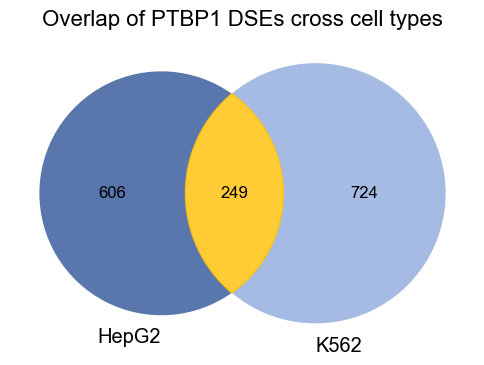

In [20]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
# Set font style globally
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'Arial'
})

# Define thresholds and sets
PTBP1_HepG2_names = set(
    cass_merged_df.loc[cass_merged_df['filter(PTBP1_HepG2)'].isin([-1, 1]), "name"]
)

PTBP1_K562_names = set(
    cass_merged_df.loc[cass_merged_df['filter(PTBP1_K562)'].isin([-1, 1]), "name"]
)

# Plotting
plt.figure(figsize=(6, 6))
venn = venn2(
    [PTBP1_HepG2_names, PTBP1_K562_names],
    set_labels=("HepG2", "K562"),
    set_colors=("#2F5597", "#8FAADC"),
    alpha=0.8
)

# Highlight overlap in yellow
venn.get_patch_by_id('11').set_color("#FFC002")

# Set title with same font
plt.title("Overlap of PTBP1 DSEs cross cell types", fontsize=16, fontname='Arial')
plt.show()

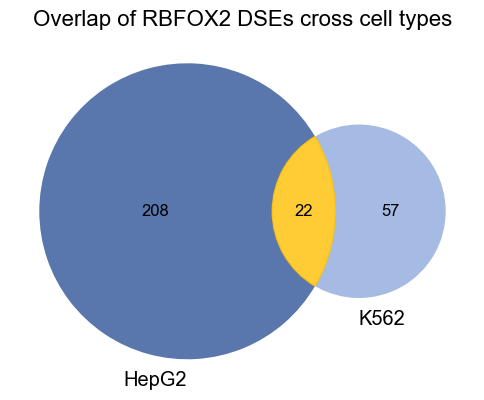

In [21]:
# Set font style globally
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'Arial'
})

# Define thresholds and sets
RBFOX2_HepG2_names = set(
    cass_merged_df.loc[cass_merged_df['filter(RBFOX2_HepG2)'].isin([-1, 1]), "name"]
)

RBFOX2_K562_names = set(
    cass_merged_df.loc[cass_merged_df['filter(RBFOX2_K562)'].isin([-1, 1]), "name"]
)

# Plotting
plt.figure(figsize=(6, 6))
venn = venn2(
    [RBFOX2_HepG2_names, RBFOX2_K562_names],
    set_labels=("HepG2", "K562"),
    set_colors=("#2F5597", "#8FAADC"),
    alpha=0.8
)

# Highlight overlap in yellow
venn.get_patch_by_id('11').set_color("#FFC002")

# Set title with same font
plt.title("Overlap of RBFOX2 DSEs cross cell types", fontsize=16, fontname='Arial')
plt.show()

In [22]:
cass_merged_df['filter(DHX9_KD.1)']

0        NaN
1        NaN
2        0.0
3       -1.0
4        NaN
        ... 
42756    NaN
42757    NaN
42758    NaN
42759    NaN
42760    NaN
Name: filter(DHX9_KD.1), Length: 42761, dtype: float64

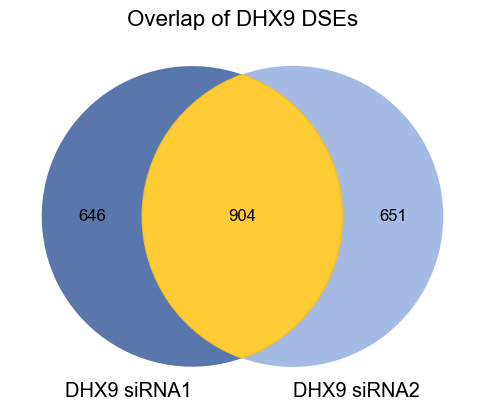

In [23]:
# Set font style globally
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'Arial'
})

# Define thresholds and sets
DHX9_Rep1_names = set(
    cass_merged_df.loc[cass_merged_df['filter(DHX9_KD.1)'].isin([-1, 1]), "name"]
)

DHX9_Rep2_K562_names = set(
    cass_merged_df.loc[cass_merged_df['filter(DHX9_KD.2)'].isin([-1, 1]), "name"]
)

# Plotting
plt.figure(figsize=(6, 6))
venn = venn2(
    [DHX9_Rep1_names, DHX9_Rep2_K562_names],
    set_labels=("DHX9 siRNA1", "DHX9 siRNA2"),
    set_colors=("#2F5597", "#8FAADC"),
    alpha=0.8
)

# Highlight overlap in yellow
venn.get_patch_by_id('11').set_color("#FFC002")

# Set title with same font
plt.title("Overlap of DHX9 DSEs", fontsize=16, fontname='Arial')
plt.show()

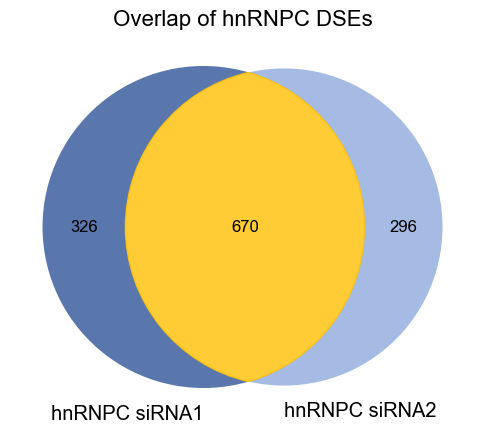

In [24]:
# Set font style globally
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'Arial'
})

# Define thresholds and sets
hnRNPC_Rep1_names = set(
    cass_merged_df.loc[cass_merged_df['filter(hnRNPC_KD.1)'].isin([-1, 1]), "name"]
)

hnRNPC_Rep2_K562_names = set(
    cass_merged_df.loc[cass_merged_df['filter(hnRNPC_KD.2)'].isin([-1, 1]), "name"]
)

# Plotting
plt.figure(figsize=(6, 6))
venn = venn2(
    [hnRNPC_Rep1_names, hnRNPC_Rep2_K562_names],
    set_labels=("hnRNPC siRNA1", "hnRNPC siRNA2"),
    set_colors=("#2F5597", "#8FAADC"),
    alpha=0.8
)

# Highlight overlap in yellow
venn.get_patch_by_id('11').set_color("#FFC002")

# Set title with same font
plt.title("Overlap of hnRNPC DSEs", fontsize=16, fontname='Arial')
plt.show()